<a id="1"></a> <br>
## Importar librerias

In [2]:
### Para el modelado
library(ARDL)

#Otros de manipulación de datos
library(forecast)
library(tseries)
library(tidyverse)
library(urca)
library(quantmod)
library(TSstudio)
library(dygraphs)
theme_set(theme_bw())
options(warn = - 1) 

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conf

<a id="1"></a> <br>
## Datos y Modelamiento

<a id="2"></a> <br>
#### Datos: Preprocesamiento

Esta sección básicamente involucra desde la descarga de los datos financieros y eliminación de datos faltantes, su visualización, adecuado formato de series de tiempo; que son procesos necesarios previos al modelamiento.

<a id="4"></a> <br>
##### a. Descarga de datos


In [3]:
###Función para obtener datos:
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")

In [4]:
#funcion para obtener los precios
precios <-function(simbolo)
{
  ##Obtener precios stocks de Yahoo FInance
  datos <- getSymbols(simbolo, auto.assign = FALSE, from=start, to=end)
  ## Elimar faltantes:
  datos<-na.omit(datos)
  ##mantener columnas con precios maximo, minimo, de cierre y volumen de mercado:
  datos <- datos[,4]
  ##Para hacerlo datos accesibles en el global environment:
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [5]:
##Llamar el activo de interés, pueden ser varios:
precios("RYLD")
precios("TSLA")
precios("TM")
precios("GM")

<a id="5"></a> <br>
##### b. Generación de formato ts.

In [6]:
#Ya que tenemos que trabajar en formato ts
## Juntamos los datos, renombramos las columnas y las visualizamos:
prices<-merge.xts(`RYLD`, `TSLA`, `TM`, `GM`, join = "inner")
dim(prices)
colnames(prices)<-c("RYLD", "TSLA", "TM", "GM")

s1=`RYLD`
s2=`TSLA`
s3=`TM`
s4=`GM`


#Podemos identificar la longitud de cada uno
length(s1)
length(s2)
length(s3)
length(s4)


[1] 933   4

[1] 933

[1] 933

[1] 933

[1] 933

<a id="6"></a> <br>
##### c. Visualización de las series de interés

In [7]:
#Podemos  visualizar la serie de tiempo 

dygraph(prices, main = c("RYLD", "TSLA", "TM", "GM")) %>%
  dyAxis("y", label = "Prices") %>%
  dyOptions(colors = RColorBrewer::brewer.pal(4, "Set1"))

HTML widgets cannot be represented in plain text (need html)

<a id="6"></a> <br>
##### d. Division Train - Test

In [8]:
#Partimos serie para train & test
h <- round(nrow(prices)*0.05, digits = 0 )
h
prices_train <- prices[1:(nrow(prices) - h), ]
prices_test<- prices[(nrow(prices) - h + 1):nrow(prices), ]

[1] 47

In [9]:
nrow(prices)
nrow(prices_train)
nrow(prices_test)

[1] 933

[1] 886

[1] 47

In [10]:
s1= prices_train$RYLD
s2= prices_train$TSLA
s3= prices_train$TM
s4= prices_train$GM


#Podemos identificar la longitud de cada uno
length(s1)
length(s2)
length(s3)
length(s4)

[1] 886

[1] 886

[1] 886

[1] 886

<a id="7"></a> <br>
##### d. Prueba de estacionariedad

In [11]:
install.packages("fUnitRoots")
library(fUnitRoots)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘fUnitRoots’


The following objects are masked from ‘package:urca’:

    punitroot, qunitroot, unitrootTable




In [12]:
# Comprobemos que las series no son estacionarias.
library(fUnitRoots)
adf.test(s1)
adf.test(s2)
adf.test(s3)
adf.test(s4)


	Augmented Dickey-Fuller Test

data:  s1
Dickey-Fuller = -1.945, Lag order = 9, p-value = 0.6016
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s2
Dickey-Fuller = -1.9481, Lag order = 9, p-value = 0.6003
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s3
Dickey-Fuller = -1.1193, Lag order = 9, p-value = 0.9195
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s4
Dickey-Fuller = -1.3697, Lag order = 9, p-value = 0.8451
alternative hypothesis: stationary


In [13]:
library(dbplyr)
adf.test(diff(s1)%>%na.omit())
adf.test(diff(s2)%>%na.omit())
adf.test(diff(s3)%>%na.omit())
adf.test(diff(s4)%>%na.omit())


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql





	Augmented Dickey-Fuller Test

data:  diff(s1) %>% na.omit()
Dickey-Fuller = -7.8812, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s2) %>% na.omit()
Dickey-Fuller = -9.0446, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s3) %>% na.omit()
Dickey-Fuller = -10.59, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s4) %>% na.omit()
Dickey-Fuller = -9.7273, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Como se observa, las series son I(1), por lo que ARDL aplica.

<a id="8"></a> <br>
## Construcción modelo ARDL
Una de las caracteristicas de este paquete, siendo una gran ventaja, es que no requiere de tanto procesamiento de las series de tiempo. Por tal motivo una vez se realiza la partición de los datos podemos entrenar el modelo. Es decir, al especificar el orden p y q para las variables, la funciión internamente genera los lags de estas.

In [14]:
pr_df=as.data.frame(prices_train)

#Se realiza una búsqueda tipo grid search:
#Selección automatica:
models <- auto_ardl(RYLD ~ TSLA + TM + GM, data = pr_df, max_order = 6)


In [15]:
#Revisemos el top 20 de los mejores modelos según su critrio de información de Akaike
models$top_orders

RYLD,TSLA,TM,GM,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,3,-307.4130
3,1,2,3,-305.8611
3,2,1,3,-305.5586
3,1,1,4,-304.8608
4,1,1,3,-304.0696
3,2,2,3,-303.9719
4,1,1,4,-303.0162
4,1,2,3,-302.5227
4,2,1,3,-302.2173


In [16]:
#Procedemos a construir el modelo de regresión con la mejor combinación.
mod1 <- ardl(RYLD ~ TSLA + TM + GM, data = pr_df, order = c(3,1,1,3))
summary(mod1)


Time series regression with "ts" data:
Start = 4, End = 886

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67649 -0.10110  0.00956  0.11214  0.73684 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1488489  0.0915044   1.627 0.104165    
L(RYLD, 1)   0.8668074  0.0309039  28.049  < 2e-16 ***
L(RYLD, 2)   0.3373508  0.0390773   8.633  < 2e-16 ***
L(RYLD, 3)  -0.2217836  0.0306534  -7.235 1.02e-12 ***
TSLA         0.0062359  0.0008919   6.992 5.41e-12 ***
L(TSLA, 1)  -0.0066197  0.0008909  -7.430 2.59e-13 ***
TM           0.0274560  0.0034883   7.871 1.04e-14 ***
L(TM, 1)    -0.0262163  0.0035202  -7.447 2.29e-13 ***
GM           0.0944349  0.0074301  12.710  < 2e-16 ***
L(GM, 1)    -0.0781005  0.0104085  -7.504 1.53e-13 ***
L(GM, 2)    -0.0346547  0.0103583  -3.346 0.000856 ***
L(GM, 3)     0.0214165  0.0075761   2.827 0.004809 ** 
---
Signif. codes

In [17]:
# Para la interpretación, podemos imprimir los rezagos correspondientes de cada variable que explican la respuesta.
mod1$full_formula

RYLD ~ L(RYLD, 1) + L(RYLD, 2) + L(RYLD, 3) + TSLA + L(TSLA, 
    1) + TM + L(TM, 1) + GM + L(GM, 1) + L(GM, 2) + L(GM, 3)

In [18]:
class(mod1)
names(mod1)

[1] "dynlm" "lm"    "ardl"

[1] "coefficients"   "residuals"      "effects"        "rank"          
 [5] "fitted.values"  "assign"         "qr"             "df.residual"   
 [9] "xlevels"        "call"           "terms"          "model"         
[13] "index"          "frequency"      "twostage"       "order"         
[17] "data"           "parsed_formula" "full_formula"

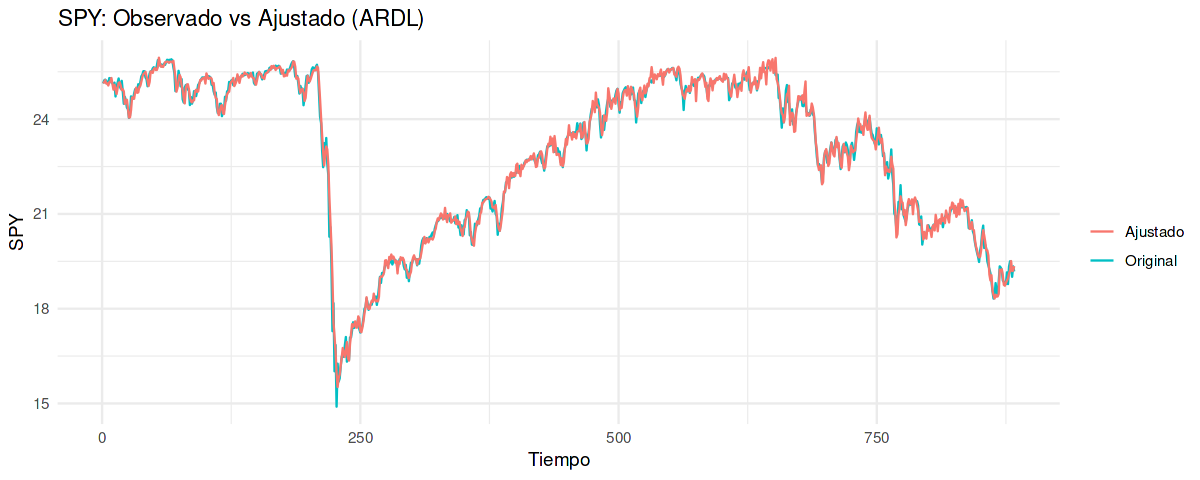

In [19]:
fitted_vals <- mod1$fitted.values
pr_df_adj <- tail(pr_df, length(fitted_vals))  # igualamos las dimensiones, pues por los rezagos, no quedaban dimensiones iguales.

pr_df_adj$fitted <- fitted_vals  

library(ggplot2)
ggplot(pr_df_adj, aes(x = 1:nrow(pr_df_adj))) +
  geom_line(aes(y = RYLD, color = "Original")) +
  geom_line(aes(y = fitted, color = "Ajustado")) +
  labs(title = "SPY: Observado vs Ajustado (ARDL)",
       x = "Tiempo",
       y = "SPY",
       color = "") +
  theme_minimal()

<a id="8a"></a> <br>
### Predicción
Procedemos ahora con la predicción del modelo y metricas de desempeño

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
887       19.36144 19.04478 19.67810 18.87714 19.84574
888       19.37379 18.90386 19.84373 18.65509 20.09250
889       19.38368 18.78451 19.98284 18.46734 20.30002
890       19.39158 18.67598 20.10719 18.29716 20.48601
891       19.39791 18.57469 20.22113 18.13890 20.65691
892       19.40297 18.47904 20.32690 17.98994 20.81599
893       19.40702 18.38814 20.42589 17.84878 20.96525
894       19.41025 18.30141 20.51909 17.71443 21.10608
895       19.41284 18.21844 20.60725 17.58616 21.23953
896       19.41492 18.13889 20.69095 17.46340 21.36644
897       19.41657 18.06246 20.77069 17.34564 21.48751
898       19.41790 17.98893 20.84687 17.23248 21.60333
899       19.41896 17.91806 20.91987 17.12352 21.71440
900       19.41981 17.84965 20.98997 17.01846 21.82117
901       19.42049 17.78353 21.05745 16.91697 21.92401
902       19.42103 17.71952 21.12255 16.81880 22.02327
903       19.42147 17.65749 21.18545 16.72369 22.11925
904       

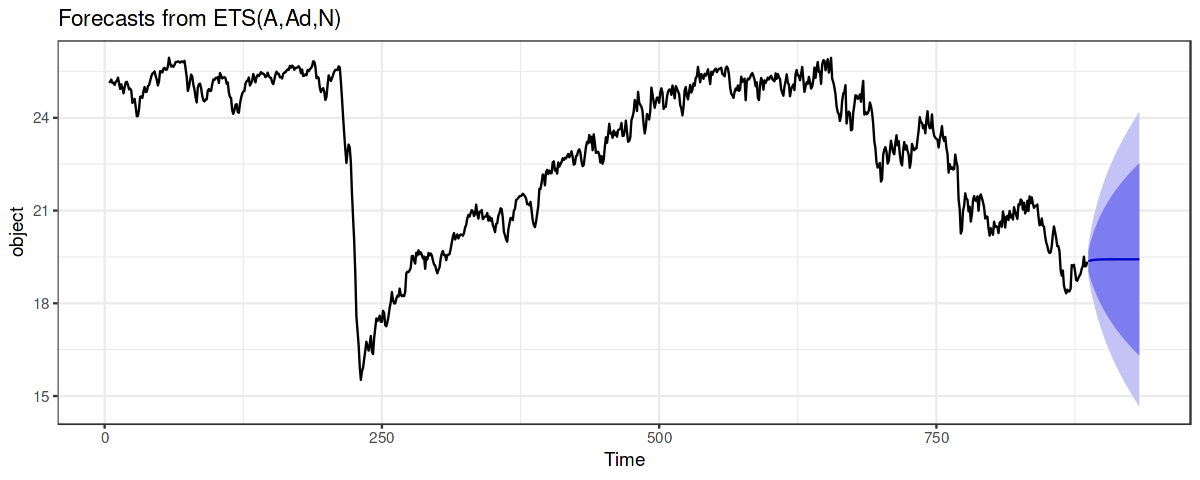

In [20]:
##Predicción del primer modelo sin tendencia:
options(repr.plot.width = 10, repr.plot.height = 4)
stats::predict(mod1$fitted.values, 47)

autoplot(predict(mod1$fitted.values, h=47))

Metricas de desempeño

In [21]:
###Cálculo error MAPE, RMSE
library(Metrics)

y_pred = predict(mod1$fitted.values, 47)$mean
y_test = prices_test$RYLD

MSE1<-mse(y_test,y_pred)
MSE1
RMSE1<-rmse(y_test,y_pred)
RMSE1
MAPE1<-mape(y_test, y_pred)
MAPE1
MAE1<-mae(y_test,y_pred)
MAE1


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




[1] 0.09358865

[1] 0.3059226

[1] 0.01251865

[1] 0.2400017

<a id="9"></a> <br>
#### A. Bound test para la verificacion de relaciones a largo término
Esta prueba basada en la prueba de hipótesis de Wald, evalua si los coeficientes de rezagos son iguales a cero, o de lo contrario existe evidencia que alguno de ellos es diferente de cero (Pesaran et al. (2001)).

In [22]:
#Guardamos el mejor modelo obtenido en la sección anterior
modelo <- models$best_model
#Realizamos la prueba de hipotesis: Hipotesis nula: no cointegración
bounds_f_test(modelo, case = 2) # el parametro "case" igual a 2 verifica si existe relaciones a largo término, con la combinación de (restricted constant o intercepto cte, no linear trend o sin tendencia determinista).


	Bounds F-test (Wald) for no cointegration

data:  d(RYLD) ~ L(RYLD, 1) + L(TSLA, 1) + L(TM, 1) + L(GM, 1) + d(L(RYLD,     1)) + d(L(RYLD, 2)) + d(TSLA) + d(TM) + d(GM) + d(L(GM, 1)) +     d(L(GM, 2))
F = 2.5919, p-value = 0.2228
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


Conclusión: No hay evidencia estadísticamente significativa de cointegración entre las variables bajo el modelo especificado (case = 2).

<a id="10"></a> <br>
#### B. Mutiplicadores de largo y corto termino
Esta función es clave para interpretar los efectos dinámicos de los regresores sobre la variable dependiente a través del tiempo. La función multipliers() del paquete ARDL calcula los multiplicadores de impacto dinámico y el multiplicador de largo plazo (long-run multiplier) del modelo ARDL. Como revisamos en la lectura, los multiplicadores son la suma de los coeficientes a largo o corto termino. En este sentido podemos calcular los multiplicadores usando la siguiente función:

In [23]:
#Multiplicadores a corto plazo
multipliers(modelo, type = "sr")
#Son los coeficientes que representan el impacto inmediato o dentro de unos pocos períodos (pero antes de alcanzar el equilibrio de largo plazo) 
#de los regresores exógenos sobre la variable dependiente.
#Indican cómo un cambio en una variable como AMZN afecta a SPY en los primeros períodos después del shock.
#Se basan en los coeficientes de los rezagos distribuidos de las variables explicativas.

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),0.148848875,0.0915043640,1.626686,1.041655e-01
2,TSLA,0.006235931,0.0008919174,6.991602,5.408892e-12
3,TM,0.027456034,0.0034882965,7.870900,1.043152e-14
4,GM,0.094434868,0.0074301356,12.709710,4.508574e-34


In [24]:
#Multiplicadores a largo plazo
multipliers(modelo)

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),8.44514390,4.021866309,2.099807,0.0360329457
2,TSLA,-0.02177608,0.005783516,-3.765197,0.0001775872
3,TM,0.07034011,0.037839392,1.858912,0.0633766642
4,GM,0.17566844,0.054624276,3.215941,0.0013481119


#Un cambio unitario de AMZN tiene un impacto de 0.033 en SPY en el largo plazo. Sin embargo, como el P valor es mayor a alfa, no hay evidencia del efecto de largo plazo de AMZN sobre SPY.
Sin embarog, para AAPL y META, si.